# Title: csck700_bsdd_enrichment

### The bsdd_enrichment Python module queries the buildingSMART Data Dictionary (bSDD) API to retrieve canonical metadata for technical properties and ensures semantic alignment. It creates extended property sets when not present in the IFC database and links new properties to them, or, when property sets already exist, it connects the enriched properties directly to the corresponding IfcPropertySet in the graph.

In [1]:
from IPython.display import Image, display

In [4]:
picture_path = r"..\references\graph_enrichment_layer.jpg"

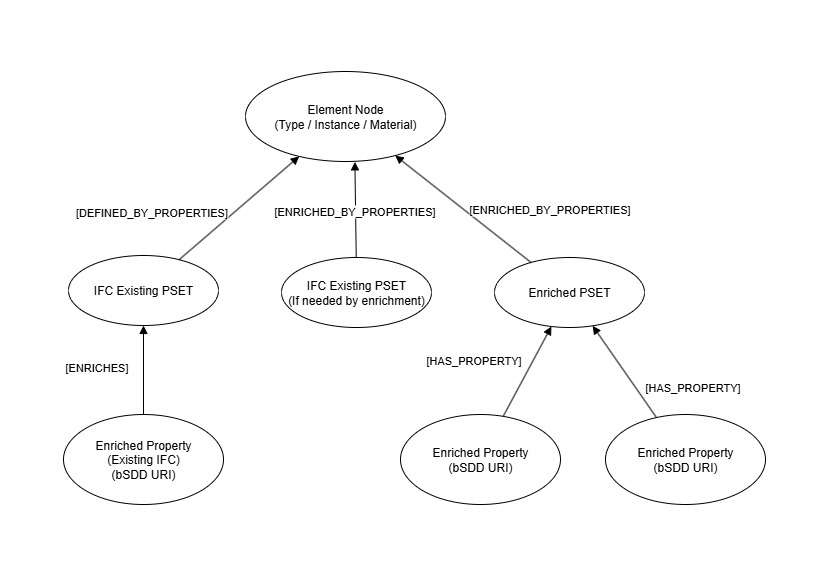

In [5]:
display(Image(filename=picture_path))

# 0. Table of content:

- [1. Settings:](#1.-Settings:)
- [2. Imports:](#2.-Imports:)
- [3. Helper functions:](#3.-Helper-functions:)
- [4. Data load:](#4.-Data-load:)  
- [5. bsDD preparation:](#5.-bsDD-preparation:)
- [6. Graph enrichment:](#6.-Graph-enrichment:)  

# 1. Settings:

# 2. Imports:

In [19]:
# !pip install pandas
import pandas as pd
# !pip install openpyxl
import openpyxl
import warnings
warnings.simplefilter("ignore", UserWarning)
import requests

# 3. Helper functions:

# 4. Data load:

In [30]:
file_path = r"..\data\raw\authoring.xlsx"

In [31]:
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print(sheet_names)

['description', 'data_validation', 'stone_wall_chimney', 'roof_wood_beam', 'strip_footing', 'beam_shoe']


In [32]:
df_names = sheet_names[2:]

In [37]:
dfs = dict()
for df_name in df_names:
    dfs[df_name] = pd.read_excel(file_path, sheet_name=df_name)

In [38]:
for name, df in dfs.items():
    print(f"\n### Dataframe: {name} ###")
    display(df.head(10))


### Dataframe: stone_wall_chimney ###


,id,asset_type,ifc_class,parameter_name_input,value_raw,operator,value_normalized,unit,target_label,ifc_exists,...,bsdd_property_uri,bsdd_label,bsdd_dictionary_code,bsdd_version,source_doc,source_clause,value_standard,mapping_confidence,roundtrip_action,notes
0,stone_001,Stone Wall,IfcWall;IfcChimney,absorption,≤ 7.5 %,≤,7.5,%,Material,True,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§2.2.5,ASTM C97,NaN,NaN,NaN
1,stone_002,Stone Wall,IfcWall;IfcChimney,bulk specific gravity,≥ 2.16 g/cm³,≥,2.16,g/cm³,Material,False,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§2.2.5,ASTM C97,NaN,NaN,NaN
2,stone_003,Stone Wall,IfcWall;IfcChimney,modulus of rupture,≥ 7 MPa,≥,7,MPa,Material,False,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§2.2.5,ASTM C99,NaN,NaN,NaN
3,stone_004,Stone Wall,IfcWall;IfcChimney,flexural strength,≥ 7 MPa,≥,7,MPa,Material,True,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§2.2.5,ASTM C880,NaN,NaN,NaN
4,stone_005,Stone Wall,IfcWall;IfcChimney,weathering classification,= suitable for exterior use,=,suitable for exterior use,NaN,Material,False,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§2.2.5,ASTM C568 / C616,NaN,NaN,NaN
5,stone_006,Stone Wall,IfcWall;IfcChimney,resistance to freezing and thawing,= pass,=,pass,NaN,Material,False,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§2.2.5,ASTM C666,NaN,NaN,NaN
6,stone_007,Stone Wall,IfcWall;IfcChimney,joint thickness,= 6–10 mm,range,6-10,mm,Type,False,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§3.3,NaN,NaN,NaN,NaN
7,stone_008,Stone Wall,IfcWall;IfcChimney,finish,= smooth machine finish free of tool marks; 4-...,enum,"{smooth machine, 4-cut, 6-cut, equivalent, fre...",NaN,Type,True,...,NaN,NaN,NaN,NaN,UFGS 04 20 00,§2.2.5,NaN,NaN,NaN,NaN



### Dataframe: roof_wood_beam ###


,id,asset_type,ifc_class,parameter_name_input,value_raw,operator,value_normalized,unit,target_label,ifc_exists,...,bsdd_property_uri,bsdd_label,bsdd_dictionary_code,bsdd_version,source_doc,source_clause,value_standard,mapping_confidence,roundtrip_action,notes
0,beam_001,Roof Wood Beam,IfcBeam,species,douglas fir-larch,=,douglas fir-larch,NaN,Material,False,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.1,NaN,NaN,NaN,NaN
1,beam_002,Roof Wood Beam,IfcBeam,grade,No.1,=,No.1,NaN,Material,False,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.1,NaN,NaN,NaN,NaN
2,beam_003,Roof Wood Beam,IfcBeam,moisture content,≤ 19%,≤,19,%,Material,True,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.1,NaN,NaN,NaN,NaN
3,beam_004,Roof Wood Beam,IfcBeam,fire retardant treatment,Pass,=,Pass,NaN,Material,False,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.2,ASTM E84,NaN,NaN,NaN
4,beam_005,Roof Wood Beam,IfcBeam,preservative treatment,CCA,=,CCA,NaN,Material,False,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.2,AWPA U1,NaN,NaN,NaN
5,beam_007,Roof Wood Beam,IfcBeam,straightness tolerance,"Lumber shall be free from bow, crook, twist, a...",enum,"{""bow_mm_per_2.4m"": 6, ""crook_mm_per_2.4m"": 6,...",NaN,Type,False,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.1,WWPA / NLGA,NaN,NaN,NaN
6,beam_008,Roof Wood Beam,IfcBeam,bending strength,11.0 Mpa,=,11,MPa,Material,True,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.1,NaN,NaN,NaN,NaN
7,beam_009,Roof Wood Beam,IfcBeam,elastic modulus,"12,400 Mpa",=,12400,MPa,Material,True,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§2.1,NaN,NaN,NaN,NaN
8,beam_010,Roof Wood Beam,IfcBeam,bearing length,≥ 90 mm,≥,90,mm,Type,False,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§3,NaN,NaN,NaN,NaN
9,beam_011,Roof Wood Beam,IfcBeam,spacing (on center),600 mm,=,600,mm,Type,False,...,NaN,NaN,NaN,NaN,UFGS 06 10 00,§3,NaN,NaN,NaN,NaN



### Dataframe: strip_footing ###


,id,asset_type,ifc_class,parameter_name_input,value_raw,operator,value_normalized,unit,target_label,ifc_exists,...,bsdd_property_uri,bsdd_label,bsdd_dictionary_code,bsdd_version,source_doc,source_clause,value_standard,mapping_confidence,roundtrip_action,notes
0,footing_001,Strip Footing,IfcFooting,compressive strength,28 MPa,=,28,MPa,Material,True,...,NaN,NaN,NaN,NaN,UFGS 03 30 01,"§2.5.1, §3.14.3.4",ASTM C39,NaN,NaN,NaN
1,footing_002,Strip Footing,IfcFooting,slump,75 ± 25 mm,=,75 ± 25,mm,Material,True,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,§3.14.3.1,ASTM C143,NaN,NaN,NaN
2,footing_003,Strip Footing,IfcFooting,water cement ratio,0.45,≤,0.45,w/cm,Material,False,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,§2.5.2.6,"ACI 211.1, ACI 211.2",NaN,NaN,NaN
3,footing_004,Strip Footing,IfcFooting,nominal maximum aggregate size,25 mm,≤,25,mm,Material,False,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,§2.3.3.1,ASTM C33,NaN,NaN,NaN
4,footing_006,Strip Footing,IfcFooting,rebar grade,grade 60,=,grade 60,NaN,Material,True,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,§2.6.1,ASTM A615,NaN,NaN,NaN
5,footing_007,Strip Footing,IfcFooting,rebar coating,uncoated,=,uncoated,NaN,Material,True,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,"§2.6.1.1, §2.6.1.4",ASTM A615,NaN,NaN,NaN
6,footing_008,Strip Footing,IfcFooting,concrete cover to rebar,≥ 75 mm,≥,75,mm,Type,True,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,§3.5.12,ACI 318,NaN,NaN,NaN
7,footing_009,Strip Footing,IfcFooting,dimensional tolerances,25 mm,=,25,mm,Type,False,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,§3.3.8,ACI 117,NaN,NaN,NaN
8,footing_010,Strip Footing,IfcFooting,surface finish,standard smooth finish,=,standard smooth finish,NaN,Type,True,...,NaN,NaN,NaN,NaN,UFGS 03 30 00,§3.9.3.3,ACI 301,NaN,NaN,NaN



### Dataframe: beam_shoe ###


,id,asset_type,ifc_class,parameter_name_input,value_raw,operator,value_normalized,unit,target_label,ifc_exists,...,bsdd_property_uri,bsdd_label,bsdd_dictionary_code,bsdd_version,source_doc,source_clause,value_standard,mapping_confidence,roundtrip_action,notes
0,beamshoe_001,Beam Shoe,IfcDiscreetAccessory,base material,stainless steel bars and shapes Type 304,=,Type 304,NaN,Material,True,...,NaN,NaN,NaN,NaN,UFGS 05 50 13,§2.2.1,ASTM A276/A276M,NaN,NaN,NaN
1,beamshoe_002,Beam Shoe,IfcDiscreetAccessory,corrosion protection,hot-dip galvanize items,=,Z275 (G90),NaN,Material,False,...,NaN,NaN,NaN,NaN,UFGS 05 50 13,§2.3.1,ASTM A123/A153,NaN,NaN,NaN
2,beamshoe_003,Beam Shoe,IfcDiscreetAccessory,anchor bolts,anchor bolts,=,55,ksi,Type,False,...,NaN,NaN,NaN,NaN,UFGS 05 50 13,§2.2.8,ASTM F1554,NaN,NaN,NaN
3,beamshoe_004,Beam Shoe,IfcDiscreetAccessory,dissimilar metal protection,dissimilar metals,=,MPI 79,NaN,Type,False,...,NaN,NaN,NaN,NaN,UFGS 05 50 13,§3.6,ASTM D1187,NaN,NaN,NaN


# 5. bsDD preparation:

## 5.1. bsDD client - REST:

In [128]:
BASE = "https://api.bsdd.buildingsmart.org"
HEADERS = {
    "accept": "application/json",
    "user-agent": "BenoitCapstone/1.0"
}

In [261]:
IFC43 = "https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3"

In [130]:
PARAMS = {
    "ClassUri": IFC43 + "/class/IfcWall"
}

In [131]:
# /api/Dictionary/v1
url = BASE + "/api/Dictionary/v1"
url

'https://api.bsdd.buildingsmart.org/api/Dictionary/v1'

In [132]:
r = requests.get(url, headers=HEADERS, timeout=30)
r.raise_for_status()

In [133]:
r.text

'{"dictionaries":[{"availableLanguages":[{"code":"EN","name":"English"},{"code":"de-DE","name":"German"},{"code":"es-ES","name":"Spanish"},{"code":"ja-JP","name":"Japanese"},{"code":"nl-NL","name":"Dutch"},{"code":"no-NO","name":"Norwegian"},{"code":"pt-PT","name":"Portuguese"},{"code":"ru-RU","name":"Russian"},{"code":"zh-CN","name":"Chinese"},{"code":"it-IT","name":"Italian"},{"code":"pl-PL","name":"Polish"},{"code":"da-DK","name":"Danish"},{"code":"cs-CZ","name":"Czech"},{"code":"pt-BR","name":"Portuguese (BR)"},{"code":"sv-SE","name":"Swedish"}],"code":"ifc","uri":"https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3","name":"IFC","version":"4.3","organizationCodeOwner":"buildingsmart","organizationNameOwner":"buildingSMART International","defaultLanguageCode":"EN","isLatestVersion":true,"isVerified":true,"isPrivate":false,"license":"CC BY-ND 4.0","licenseUrl":"https://creativecommons.org/licenses/by-nd/4.0/legalcode","qualityAssuranceProcedure":"IFC is a standardized dig

### PORPERTIES PER CLASS:

In [206]:
url = BASE + "/api/Class/Properties/v1"
url

'https://api.bsdd.buildingsmart.org/api/Class/Properties/v1'

In [207]:
PARAMS = {
    "ClassUri": IFC43 + "/class/IfcWall"
}

In [208]:
IFC43 + "/class/IfcWall"

'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/class/IfcWall'

In [209]:
response = requests.get(url, headers=HEADERS, timeout=30, params=PARAMS)

In [210]:
print(response.status_code)

200


In [213]:
data = response.json()
data

{'classUri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/class/IfcWall',
 'classProperties': [{'name': 'Description',
   'uri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/class/IfcWall/prop/Attributes/Description',
   'description': 'Optional description, provided for exchanging informative comments.',
   'definition': 'Optional description, provided for exchanging informative comments.',
   'dataType': 'String',
   'propertyCode': 'Description',
   'propertyDictionaryName': 'IFC',
   'propertyDictionaryUri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3',
   'propertyUri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/prop/Description',
   'propertySet': 'Attributes',
   'propertyStatus': 'Active',
   'propertyValueKind': 'Single'},
  {'name': 'Element Type',
   'uri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/class/IfcWall/prop/Attributes/ElementType',
   'description': "The type denote

In [214]:
for prop in data["classProperties"]:
    if prop["name"] == "Element Type":
        print(prop)

{'name': 'Element Type', 'uri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/class/IfcWall/prop/Attributes/ElementType', 'description': "The type denotes a particular type that indicates the object further. The use has to be established at the level of instantiable subtypes. In particular it holds the user defined type, if the enumeration of the attribute 'PredefinedType' is set to [[USERDEFINED]].", 'definition': "The type denotes a particular type that indicates the object further. The use has to be established at the level of instantiable subtypes. In particular it holds the user defined type, if the enumeration of the attribute 'PredefinedType' is set to [[USERDEFINED]].", 'dataType': 'String', 'propertyCode': 'ElementType', 'propertyDictionaryName': 'IFC', 'propertyDictionaryUri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3', 'propertyUri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/prop/ElementType', 'propertySet': 'Attr

### PROPERTIES FREE SEARCH:

In [138]:
BASE2 = "https://search.bsdd.buildingsmart.org"

In [139]:
# url = BASE2 + "/api/TextSearch/v2"
# url

'https://search.bsdd.buildingsmart.org/api/TextSearch/v2'

In [221]:
url = BASE + "/api/TextSearch/v2"
url

'https://api.bsdd.buildingsmart.org/api/TextSearch/v2'

In [222]:
# url = BASE + "/api/Search/TextSearch"
# url

In [262]:
IFC43

'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3'

In [224]:
ETIM = "https://identifier.buildingsmart.org/uri/etim/etim/10.0"

In [225]:
PARAMS2 = {
    "SearchText": "Element Type",
    "TypeFilter": "Property",
    "DictionaryUris": [IFC43, ETIM]
}

In [226]:
response2 = requests.get(url, headers=HEADERS, timeout=30, params=PARAMS2)

In [227]:
print(response2.status_code)

200


In [228]:
data2 = response2.json()
data2

{'classes': [],
 'dictionaries': [{'uri': 'https://identifier.buildingsmart.org/uri/etim/etim/10.0',
   'organizationName': 'ETIM International',
   'code': 'etim',
   'name': 'ETIM',
   'version': '10.0',
   'status': 'Active',
   'languages': [{'isoCode': 'EN', 'name': 'English'},
    {'isoCode': 'de-DE', 'name': 'German'},
    {'isoCode': 'nb-NO', 'name': 'Norwegian (Bokmål)'}],
   'isLatestVersion': True,
   'isVerified': True}],
 'properties': [{'dictionaryUri': 'https://identifier.buildingsmart.org/uri/etim/etim/10.0',
   'uri': 'https://identifier.buildingsmart.org/uri/etim/etim/10.0/prop/EF012207',
   'code': 'EF012207',
   'name': 'Mounting type of the fixing element'},
  {'dictionaryUri': 'https://identifier.buildingsmart.org/uri/etim/etim/10.0',
   'uri': 'https://identifier.buildingsmart.org/uri/etim/etim/10.0/prop/EF005345',
   'code': 'EF005345',
   'name': 'Thermal element type B'},
  {'dictionaryUri': 'https://identifier.buildingsmart.org/uri/etim/etim/10.0',
   'uri': 

In [294]:
IFC43

'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3'

In [295]:
url3 = BASE + "/api/TextSearch/v2"
url3

'https://api.bsdd.buildingsmart.org/api/TextSearch/v2'

In [296]:
# BASE2 = "https://identifier.buildingsmart.org/uri/buildingsmart/ifc-pset/4.0.2.1"
# url4 = BASE2 + "/api/TextSearch/v2"
# url4

In [304]:
PARAMS3 = {
    "SearchText": "P",
    "TypeFilter": "GroupOfProperties",
    "DictionaryUris": [IFC43]
}

In [305]:
response3 = requests.get(url3, headers=HEADERS, timeout=30, params=PARAMS3)
response3.status_code

200

In [306]:
data3 = response3.json()
data3

{'classes': [],
 'dictionaries': [],
 'properties': [],
 'totalCount': 0,
 'offset': 0,
 'count': 0}

In [300]:

psets = []
for r in response3:
    pset_uri = r["uri"]                    # the class URI of the Pset (e.g., .../class/Pset_WallCommon)
    meta = requests.get(f"{BASE}/api/Class/v1",
                        params={"ClassUri": pset_uri},
                        timeout=30).json()
    related = meta.get("relatedIfcEntities", [])  # names like ["IfcWall","IfcWallType",...]
    if "IfcWall" in related or "IfcWallType" in related:
        psets.append({"name": meta.get("name"), "uri": pset_uri})

TypeError: byte indices must be integers or slices, not str

In [248]:
BASE  = "https://api.bsdd.buildingsmart.org"
IFC43 = "https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3"

# 1) Does a known Pset class exist here?
import requests
r = requests.get(f"{BASE}/api/Class/v1",
                 params={"ClassUri": f"{IFC43}/class/Pset_WallCommon"},
                 timeout=30)
print("Pset_WallCommon status:", r.status_code)   # very likely 404 in this dictionary

Pset_WallCommon status: 404


In [312]:
url = BASE + "/api/Class/Properties/v1"
url

'https://api.bsdd.buildingsmart.org/api/Class/Properties/v1'

In [313]:
PARAMS = {
    "ClassUri": IFC43 + "/class/Pset_WallCommon"
}

In [314]:
r = requests.get(url, headers=HEADERS, timeout=30, params=PARAMS)

In [315]:
print(r.status_code)

200


In [316]:
data = r.json()
data

{'classUri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/class/Pset_WallCommon',
 'classProperties': [{'name': 'Acoustic Rating',
   'uri': 'https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3/class/Pset_WallCommon/prop/Pset_WallCommon/AcousticRating',
   'description': "Technical note: in IFC this property takes 'IfcLabel' as value. Such objects are not included in bSDD for simplicity reason. IFC also doesn't enforce particular units, but recommends using metric SI units (metre, kilogram, etc.). Read the IFC documentation for more information.",
   'definition': 'Acoustic rating for this object.; It is provided according to the national building code. It indicates the sound transmission resistance of this object by an index ratio (instead of providing full sound absorption values).',
   'dataType': 'String',
   'propertyCode': 'AcousticRating',
   'propertyDictionaryName': 'IFC',
   'propertyDictionaryUri': 'https://identifier.buildingsmart.org/uri/build

###################################

In [317]:
API_BASE = "https://api.bsdd.buildingsmart.org/api/Dictionary/v1/Classes"
IFC43_URI = "https://identifier.buildingsmart.org/uri/buildingsmart/ifc/4.3"

params = {
    "Uri": IFC43_URI,
    "ClassType": "GroupOfProperties",
    "Limit": 2000,   # increase if needed
    "Offset": 0
}

resp = requests.get(API_BASE, params=params)
resp.raise_for_status()
data = resp.json()

psets = data.get("classes") or data.get("Classes") or []

print("Total Psets found:", len(psets))
for p in psets:
    print(p.get("code") or p.get("Code"))

Total Psets found: 745
Pset_ActionRequest
Pset_ActorCommon
Pset_ActuatorPHistory
Pset_ActuatorTypeCommon
Pset_ActuatorTypeElectricActuator
Pset_ActuatorTypeHydraulicActuator
Pset_ActuatorTypeLinearActuation
Pset_ActuatorTypePneumaticActuator
Pset_ActuatorTypeRotationalActuation
Pset_Address
Pset_AirSideSystemInformation
Pset_AirTerminalBoxPHistory
Pset_AirTerminalBoxTypeCommon
Pset_AirTerminalOccurrence
Pset_AirTerminalPHistory
Pset_AirTerminalTypeCommon
Pset_AirToAirHeatRecoveryPHistory
Pset_AirToAirHeatRecoveryTypeCommon
Pset_AlarmPHistory
Pset_AlarmTypeCommon
Pset_AnnotationContourLine
Pset_AnnotationLineOfSight
Pset_AnnotationSurveyArea
Pset_Asset
Pset_AudioVisualAppliancePHistory
Pset_AudioVisualApplianceTypeAmplifier
Pset_AudioVisualApplianceTypeCamera
Pset_AudioVisualApplianceTypeCommon
Pset_AudioVisualApplianceTypeDisplay
Pset_AudioVisualApplianceTypePlayer
Pset_AudioVisualApplianceTypeProjector
Pset_AudioVisualApplianceTypeRailwayCommunicationT
Pset_AudioVisualApplianceTypeRec

## 5.2. Property resolution logic:

## 5.3. Load authoring sheet:

## 5.4. Fill bsDD columns:

# 6. Graph enrichment:

## 6.1. Compile targets from graph:

## 6.2. Cypher generation:

## 6.3. Sanity check:

# 7. Data save: